In [1]:
import os
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import defaultdict

In [2]:
unaugmented_run_path = "/efs-cotton/outputs/fast-autoaugment/confs/hardnessaware/double_prop2/wresnet28x10_rcifar-no-aug-at-all/logs"
augmented_run_path = "/efs-cotton/outputs/fast-autoaugment/confs/hardnessaware/double_prop2/wresnet28x10_rcifar-AA/logs"

In [3]:
!ls $unaugmented_run_path

hardness_data_epoch_1.pt    hardness_data_epoch_19.pt
hardness_data_epoch_10.pt   hardness_data_epoch_190.pt
hardness_data_epoch_100.pt  hardness_data_epoch_191.pt
hardness_data_epoch_101.pt  hardness_data_epoch_192.pt
hardness_data_epoch_102.pt  hardness_data_epoch_193.pt
hardness_data_epoch_103.pt  hardness_data_epoch_194.pt
hardness_data_epoch_104.pt  hardness_data_epoch_195.pt
hardness_data_epoch_105.pt  hardness_data_epoch_196.pt
hardness_data_epoch_106.pt  hardness_data_epoch_197.pt
hardness_data_epoch_107.pt  hardness_data_epoch_198.pt
hardness_data_epoch_108.pt  hardness_data_epoch_199.pt
hardness_data_epoch_109.pt  hardness_data_epoch_2.pt
hardness_data_epoch_11.pt   hardness_data_epoch_20.pt
hardness_data_epoch_110.pt  hardness_data_epoch_200.pt
hardness_data_epoch_111.pt  hardness_data_epoch_21.pt
hardness_data_epoch_112.pt  hardness_data_epoch_22.pt
hardness_data_epoch_113.pt  hardness_data_epoch_23.pt
hardness_data_epoch_114.pt  hardness_data_epoch_24.pt
hardness_data_epoc

In [7]:
num_epochs = 200
epochs = np.arange(1, num_epochs+1)
measure = "absoluteAVH"

In [8]:
unaug_data = dict()
for epoch in epochs:
    path = os.path.join(unaugmented_run_path, "hardness_data_epoch_{}.pt".format(epoch))
    unaug_data["epoch_{}".format(epoch)] = torch.load(path)

In [6]:
unaug_data.keys()

dict_keys(['epoch_1', 'epoch_2', 'epoch_3', 'epoch_4', 'epoch_5'])

In [9]:
data = []
index = []
unaug_df = dict()
for epoch in epochs:
    for i in range(1, 33):
        data.append(unaug_data['epoch_{}'.format(epoch)]['batch_{}'.format(i)]["absoluteAVH"])
        index.append('epoch_{}_batch_{}'.format(epoch, i))
unaug_df["absoluteAVH"] = pd.DataFrame(data, index=index)

data = []
index = []
for epoch in epochs:
    for i in range(1, 33):
        data.append(unaug_data['epoch_{}'.format(epoch)]['batch_{}'.format(i)]["AVH"])
        index.append('epoch_{}_batch_{}'.format(epoch, i))
unaug_df["AVH"] = pd.DataFrame(data, index=index)

data = []
index = []
for epoch in epochs:
    for i in range(1, 33):
        data.append(unaug_data['epoch_{}'.format(epoch)]['batch_{}'.format(i)]["absoluteinstance_loss"])
        index.append('epoch_{}_batch_{}'.format(epoch, i))
unaug_df["instance_loss"] = pd.DataFrame(data, index=index)

In [10]:
len(unaug_df["AVH"])

6400

In [156]:
first_batch = unaug_df.loc['epoch_1_batch_1'].sort_values()
splits = np.array_split(first_batch, 10)

In [157]:
splits[0].index

Int64Index([24486, 11640, 44590, 49080, 42954,  8875, 41859, 47989, 28292,
            19930,
            ...
             7545, 43792,  7349, 37310, 47386, 44211, 46667, 16745, 40608,
            19166],
           dtype='int64', length=400)

In [158]:
unaug_df[splits[0].index]

,24486,11640,44590,49080,42954,8875,41859,47989,28292,19930,...,7545,43792,7349,37310,47386,44211,46667,16745,40608,19166
epoch_1_batch_1,0.095757,0.095917,0.095983,0.096023,0.096041,0.096053,0.096065,0.096071,0.096083,0.096098,...,0.097870,0.097871,0.097872,0.097872,0.097874,0.097875,0.097876,0.097878,0.097880,0.097884
epoch_1_batch_2,0.097923,0.098109,0.096073,0.097406,0.097665,0.097292,0.098519,0.098719,0.098411,0.098688,...,0.097597,0.098264,0.099774,0.096844,0.096544,0.096309,0.096685,0.099949,0.096691,0.100179
epoch_1_batch_3,0.098149,0.098772,0.095935,0.097429,0.097701,0.098008,0.098684,0.098966,0.098593,0.099175,...,0.097461,0.098737,0.099217,0.097436,0.096723,0.096228,0.096929,0.099594,0.096711,0.100238
epoch_1_batch_4,0.097745,0.098048,0.095897,0.097008,0.097555,0.097884,0.098613,0.098492,0.098186,0.098853,...,0.097273,0.099361,0.098805,0.097468,0.096312,0.095953,0.096897,0.098900,0.096732,0.099252
epoch_1_batch_5,0.096772,0.097642,0.095898,0.096863,0.097725,0.097789,0.097326,0.097874,0.097820,0.098500,...,0.097277,0.098820,0.098734,0.097333,0.096579,0.096378,0.097024,0.098735,0.096955,0.097950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
epoch_5_batch_28,0.072889,0.082454,0.084331,0.094161,0.086324,0.094063,0.080753,0.071120,0.071848,0.074770,...,0.078187,0.075025,0.081400,0.090500,0.080451,0.083204,0.080852,0.076847,0.090418,0.084401
epoch_5_batch_29,0.071295,0.078716,0.079750,0.093696,0.081429,0.087315,0.080507,0.074509,0.069488,0.069897,...,0.083626,0.093381,0.069903,0.099194,0.085804,0.084994,0.086243,0.069790,0.091155,0.084381
epoch_5_batch_30,0.065253,0.073789,0.076068,0.096860,0.076161,0.087573,0.080282,0.068777,0.069606,0.070357,...,0.082843,0.080864,0.063143,0.095774,0.088809,0.085323,0.088485,0.062951,0.095349,0.085199
epoch_5_batch_31,0.079723,0.082662,0.086541,0.105152,0.092385,0.094095,0.095457,0.082579,0.083085,0.082904,...,0.085876,0.071624,0.079759,0.090020,0.097956,0.087492,0.094414,0.073723,0.104066,0.090701


In [11]:
indices = list(unaug_df["AVH"].sum(axis=0).sort_values().index[[0, 1000, 2000, 3000, 3999]])

In [12]:
indices

[39118, 40247, 21042, 5012, 26913]

In [32]:
num_epochs=200

In [89]:
from collections import defaultdict
train_batch = defaultdict(list)
for i in range(1, num_epochs*32+1):
    epoch = (i-1)//32 + 1
    batch = i%32
    if batch==0:
        batch = 32
    batch_indices = unaug_data['epoch_{}'.format(epoch)]['batch_{}_indices'.format(batch)]
    for idx in list(unaug_df[measure].columns):
        if idx in batch_indices:
            train_batch[idx].append(i)

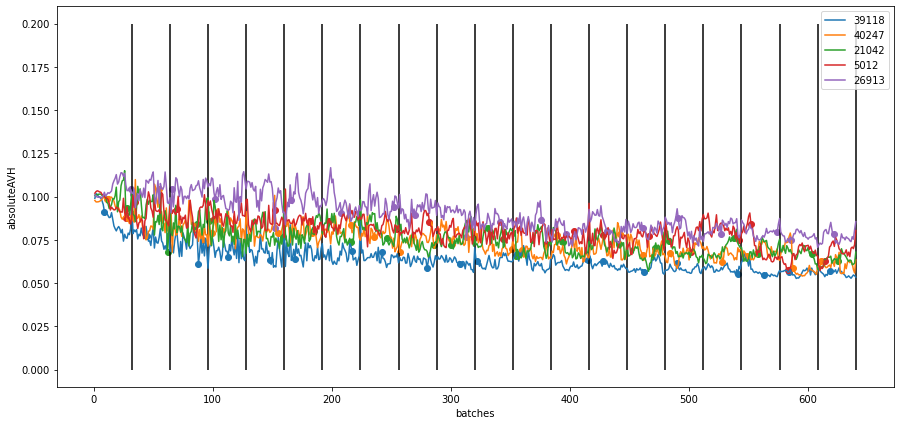

In [25]:
x = np.arange(1, num_epochs*32 + 1)
plt.figure(figsize=(15,7))
for idx in indices:
    plt.plot(x, unaug_df["absoluteAVH"][idx][:num_epochs*32])
    plt.scatter(train_batch[idx], [unaug_df["absoluteAVH"][idx]['epoch_{}_batch_{}'.format(j+1, 32 if i%32==0 else i%32)] for j, i in enumerate(train_batch[idx])])
plt.vlines(x=epochs[:num_epochs]*32, ymin=0, ymax=0.2, colors='k')
plt.xlabel('batches')
plt.ylabel("absoluteAVH")
plt.legend(indices)
plt.show()

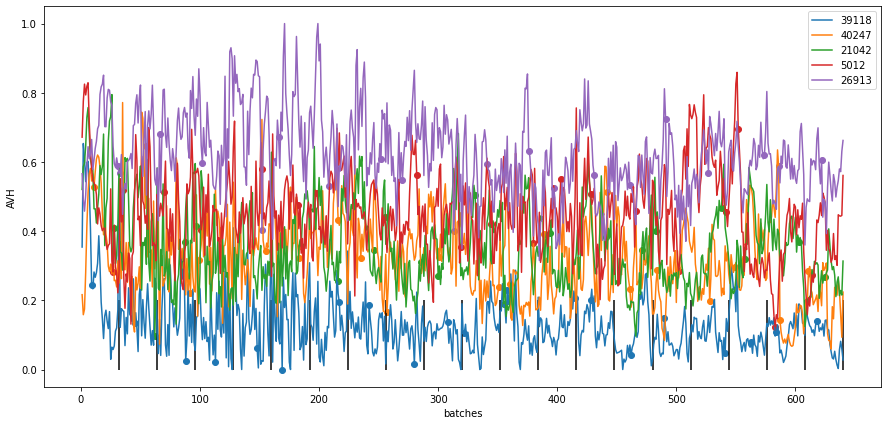

In [28]:
x = np.arange(1, num_epochs*32 + 1)
plt.figure(figsize=(15,7))
for idx in indices:
    plt.plot(x, unaug_df["AVH"][idx][:num_epochs*32])
    plt.scatter(train_batch[idx], [unaug_df["AVH"][idx]['epoch_{}_batch_{}'.format(j+1, 32 if i%32==0 else i%32)] for j, i in enumerate(train_batch[idx])])
plt.vlines(x=epochs[:num_epochs]*32, ymin=0, ymax=0.2, colors='k')
plt.xlabel('batches')
plt.ylabel("AVH")
plt.legend(indices)
plt.show()

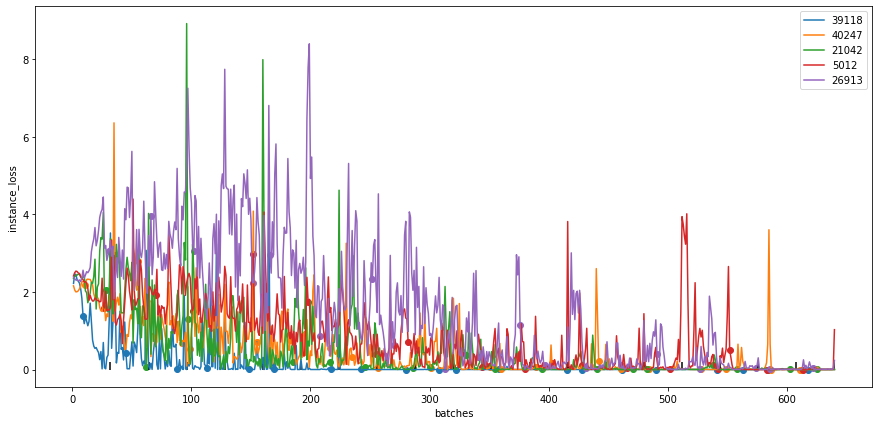

In [29]:
x = np.arange(1, num_epochs*32 + 1)
plt.figure(figsize=(15,7))
for idx in indices:
    plt.plot(x, unaug_df["instance_loss"][idx][:num_epochs*32])
    plt.scatter(train_batch[idx], [unaug_df["instance_loss"][idx]['epoch_{}_batch_{}'.format(j+1, 32 if i%32==0 else i%32)] for j, i in enumerate(train_batch[idx])])
plt.vlines(x=epochs[:num_epochs]*32, ymin=0, ymax=0.2, colors='k')
plt.xlabel('batches')
plt.ylabel("instance_loss")
plt.legend(indices)
plt.show()

In [37]:
len(train_batch[39118])

200

In [ ]:
epochwise_staleness = dict()

In [65]:
staleness = defaultdict(list)
measure = "absoluteAVH"
for epoch in range(2, num_epochs+1):
    for idx in indices:
        u_batch_measure = unaug_df[measure][idx]["epoch_{}_batch_{}".format(epoch-1, 32)]
        t_batch = train_batch[idx][epoch-1]
        t_batch = 32 if t_batch%32==0 else t_batch%32
        t_batch_measure = unaug_df[measure][idx]["epoch_{}_batch_{}".format(epoch, t_batch)]
        staleness[idx].append(t_batch_measure-u_batch_measure)
epochwise_staleness[measure] = staleness

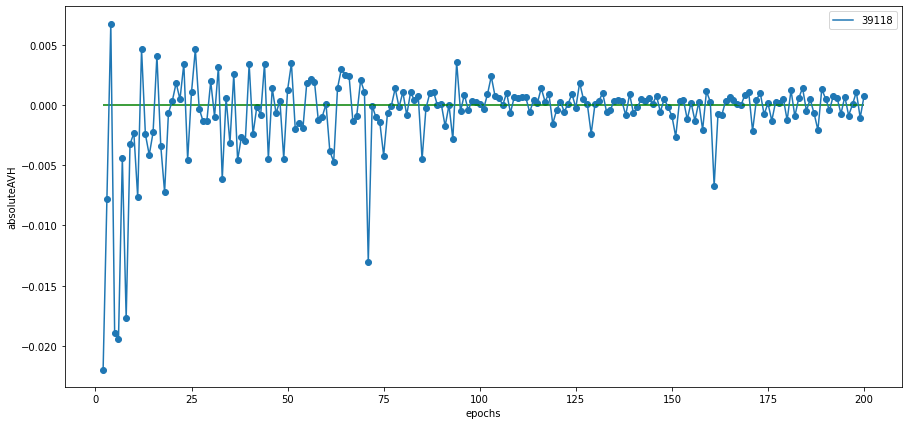

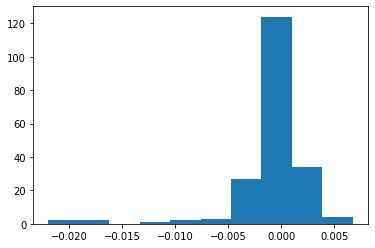

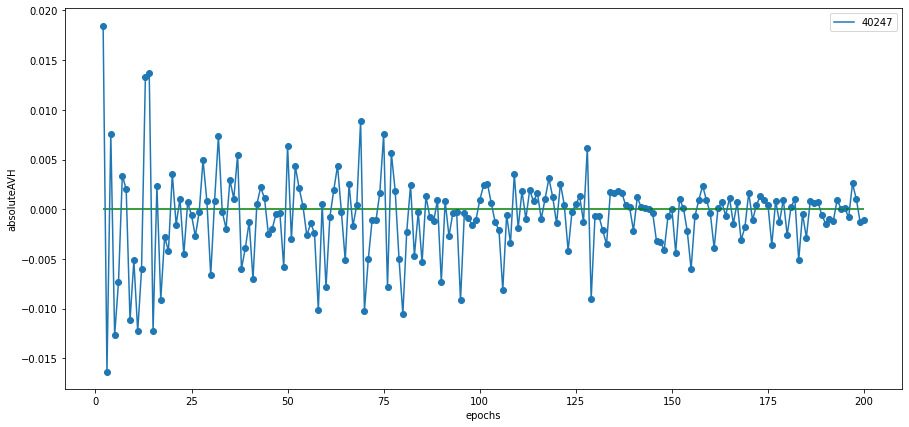

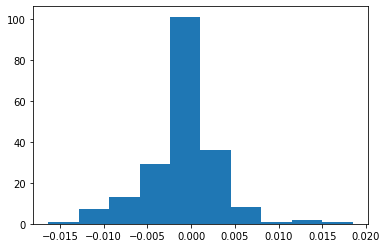

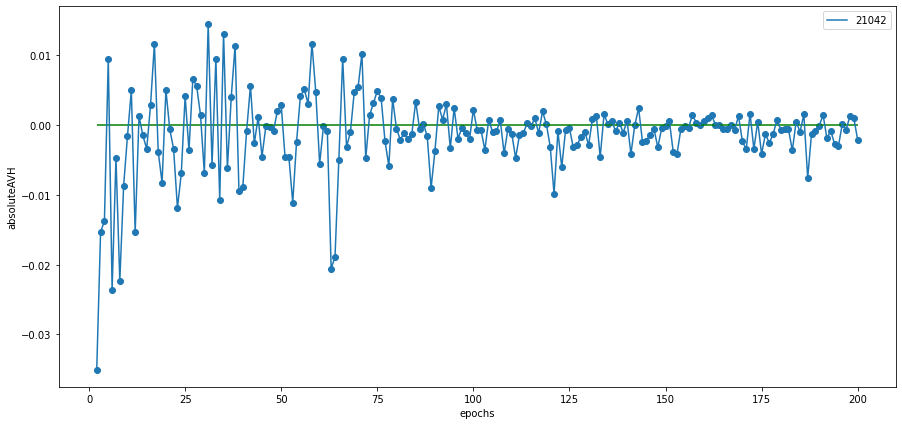

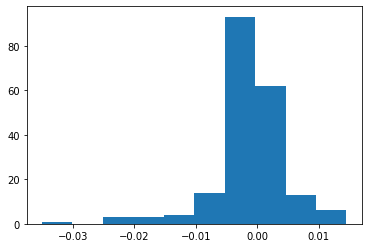

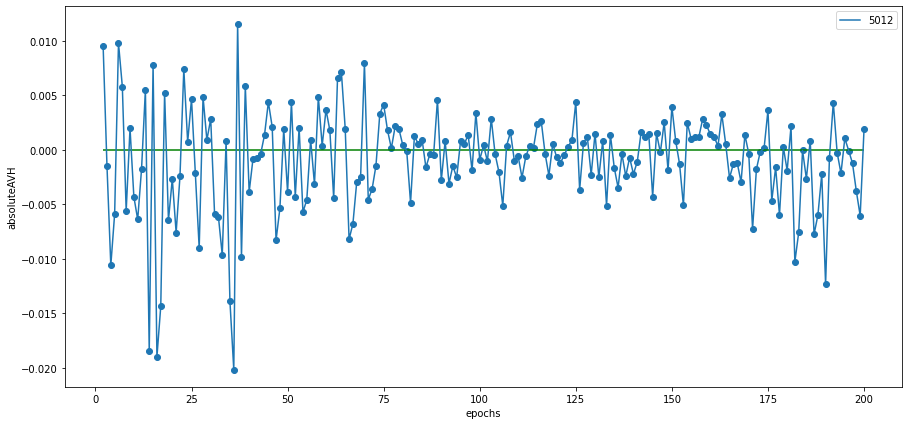

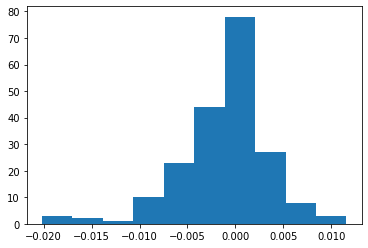

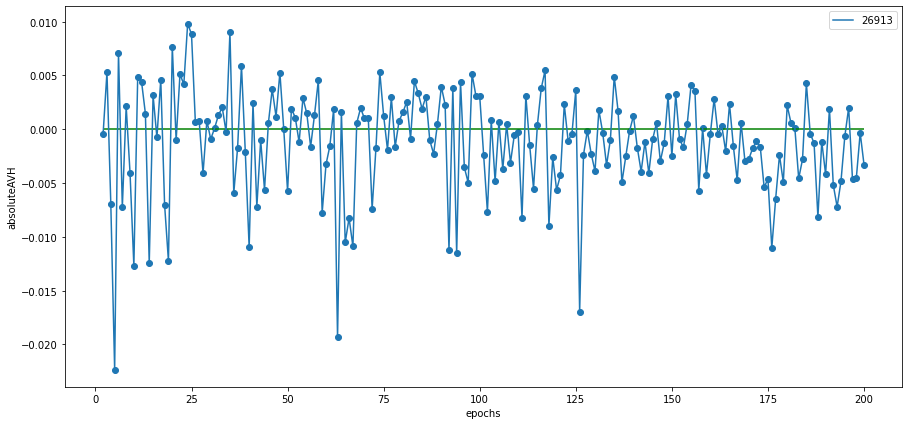

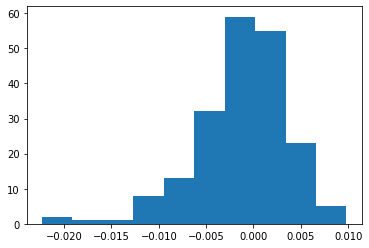

In [66]:
x = np.arange(2, num_epochs + 1)

measure = "absoluteAVH"
for idx in indices:
    plt.figure(figsize=(15,7))
    plt.plot(x, epochwise_staleness[measure][idx])
    plt.scatter(x, epochwise_staleness[measure][idx])
    plt.hlines(y=0, xmin=2, xmax=num_epochs, color='green')
#     plt.hist(epochwise_staleness[idx])
    plt.xlabel('epochs')
    plt.ylabel(measure)
    plt.legend([idx])
    plt.show()
    plt.hist(epochwise_staleness[measure][idx])
    plt.show()


In [67]:
staleness = defaultdict(list)
measure = "AVH"
for epoch in range(2, num_epochs+1):
    for idx in indices:
        u_batch_measure = unaug_df[measure][idx]["epoch_{}_batch_{}".format(epoch-1, 32)]
        t_batch = train_batch[idx][epoch-1]
        t_batch = 32 if t_batch%32==0 else t_batch%32
        t_batch_measure = unaug_df[measure][idx]["epoch_{}_batch_{}".format(epoch, t_batch)]
        staleness[idx].append(t_batch_measure-u_batch_measure)
        
epochwise_staleness[measure] = staleness

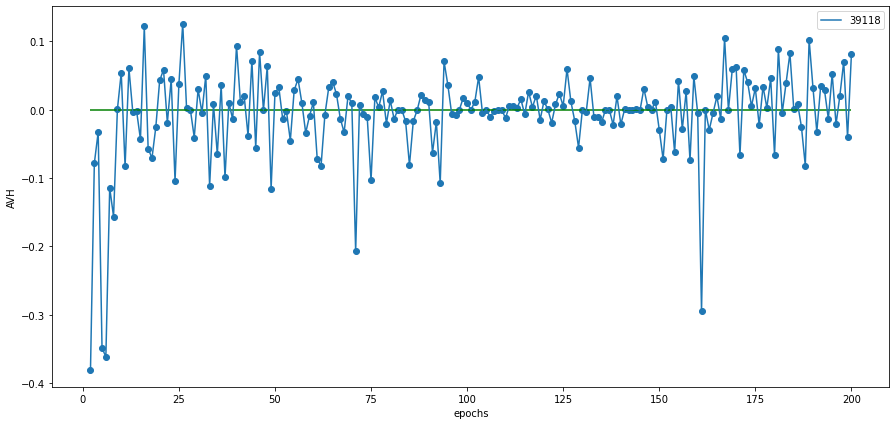

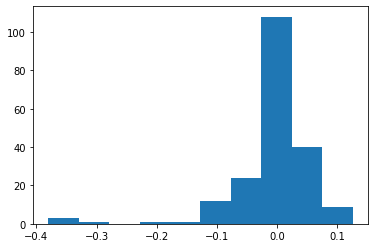

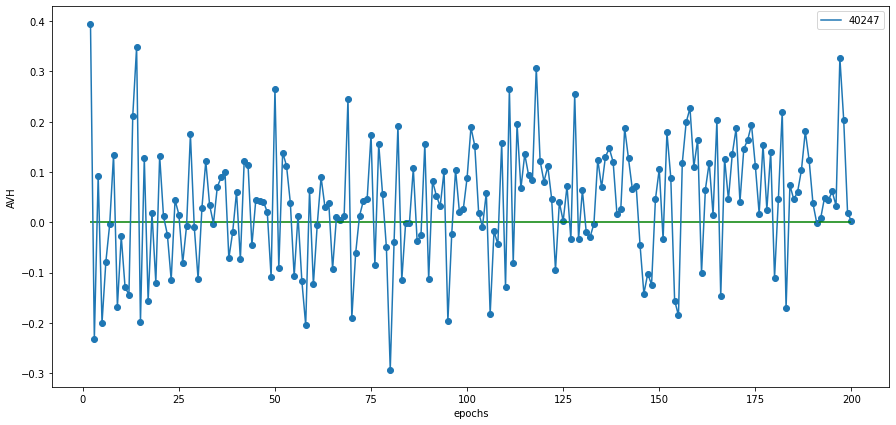

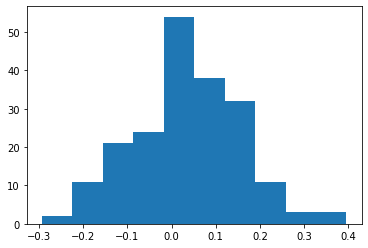

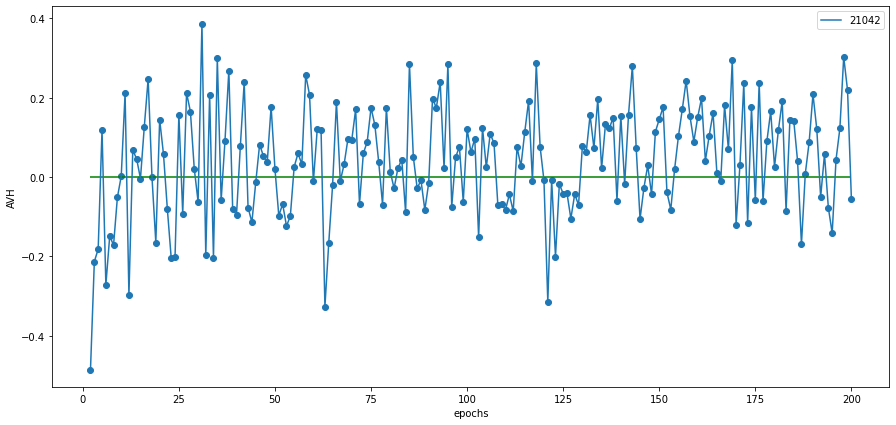

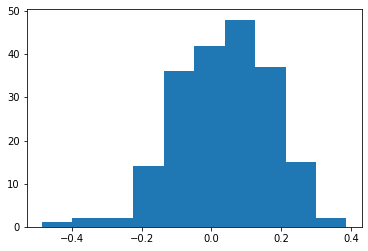

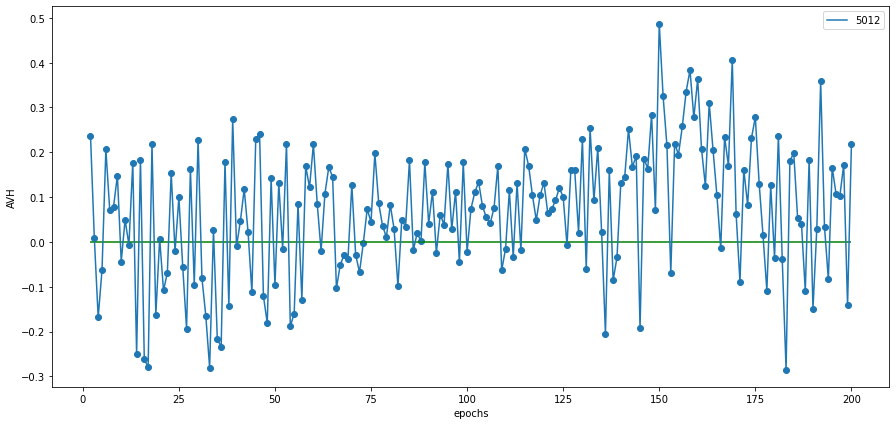

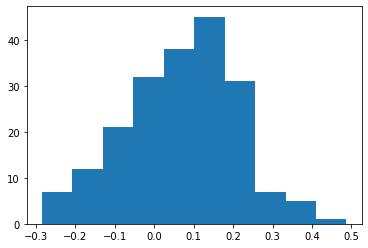

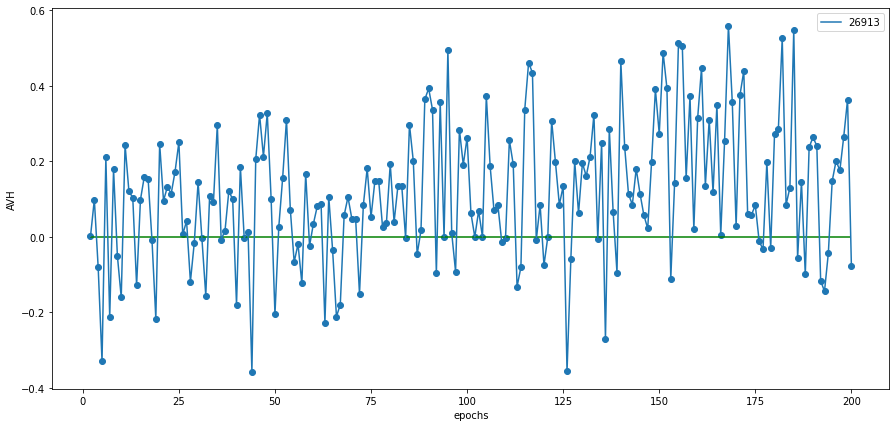

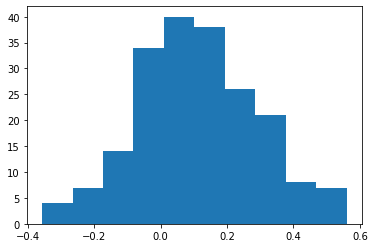

In [68]:
x = np.arange(2, num_epochs + 1)

measure = "AVH"
for idx in indices:
    plt.figure(figsize=(15,7))
    plt.plot(x, epochwise_staleness[measure][idx])
    plt.scatter(x, epochwise_staleness[measure][idx])
    plt.hlines(y=0, xmin=2, xmax=num_epochs, color='green')
#     plt.hist(epochwise_staleness[idx])
    plt.xlabel('epochs')
    plt.ylabel(measure)
    plt.legend([idx])
    plt.show()
    plt.hist(epochwise_staleness[measure][idx])
    plt.show()

In [69]:
batchwise_staleness = dict()

In [70]:
staleness = defaultdict(list)
measure = "absoluteAVH"
for epoch in range(2, num_epochs+1):
    for idx in indices:
        p_batch = train_batch[idx][epoch-2]
        p_batch = 32 if t_batch%32==0 else t_batch%32
        p_batch_measure = unaug_df[measure][idx]["epoch_{}_batch_{}".format(epoch-1, p_batch)]
        t_batch = train_batch[idx][epoch-1]
        t_batch = 32 if t_batch%32==0 else t_batch%32
        t_batch_measure = unaug_df[measure][idx]["epoch_{}_batch_{}".format(epoch, t_batch)]
        staleness[idx].append(t_batch_measure-p_batch_measure)
        
batchwise_staleness[measure] = staleness

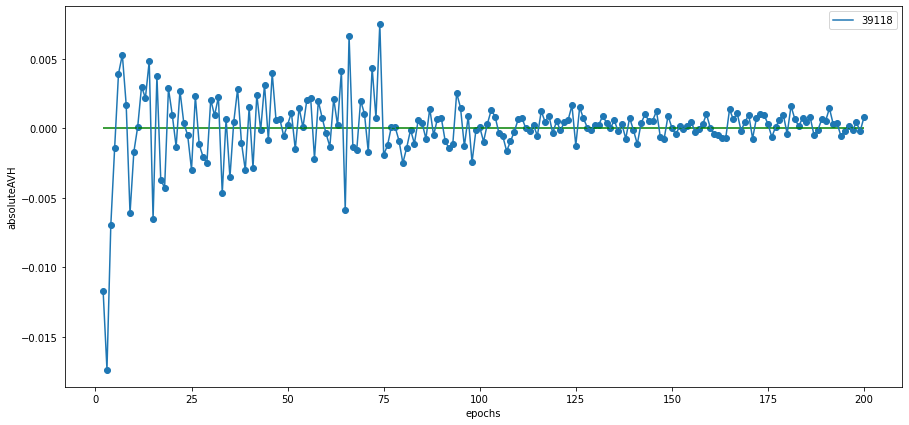

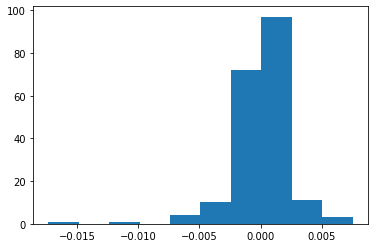

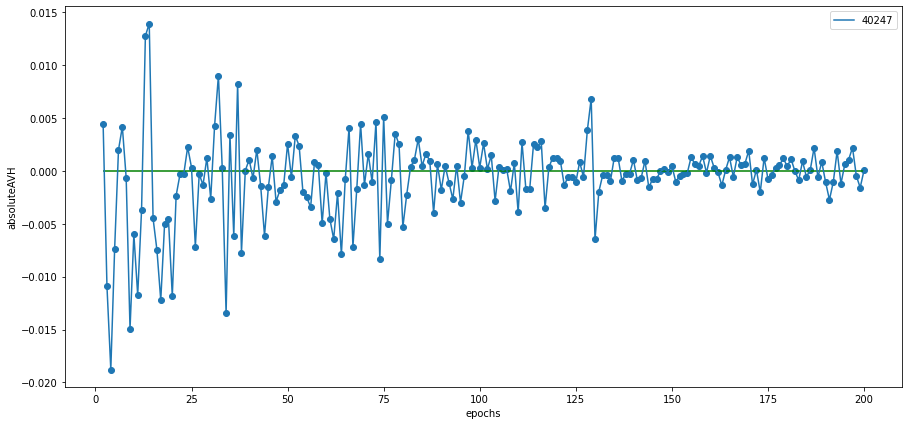

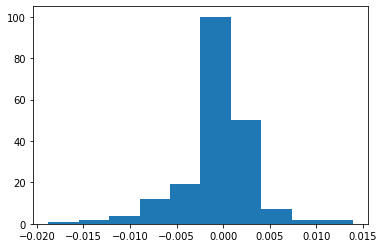

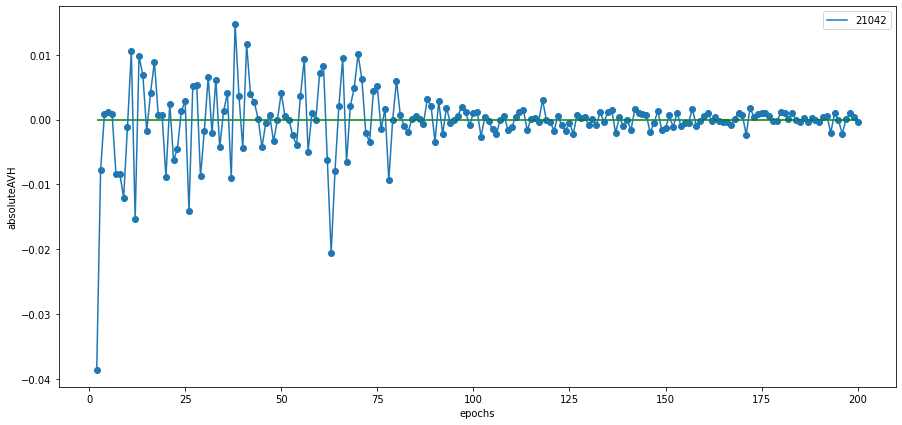

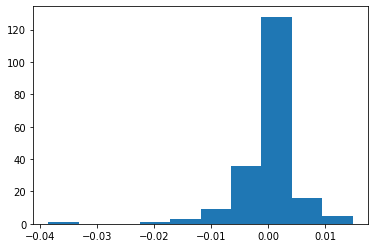

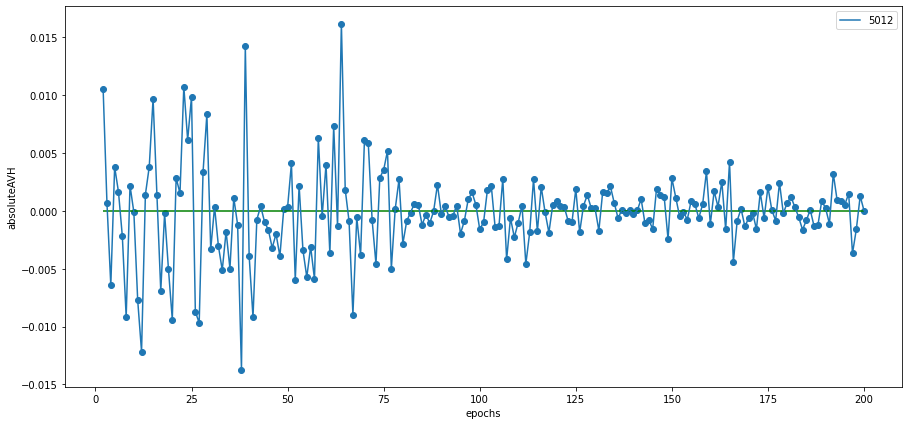

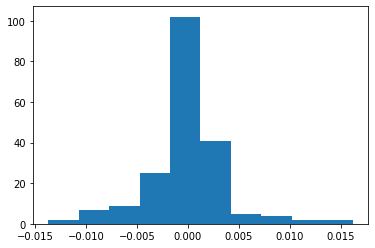

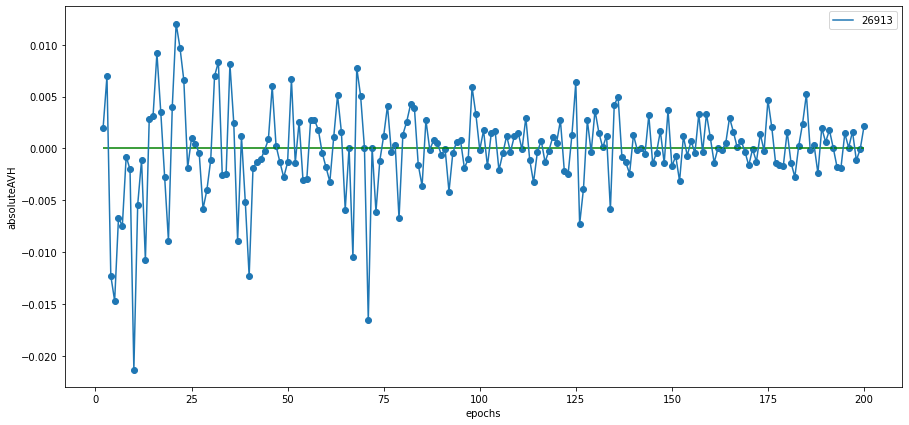

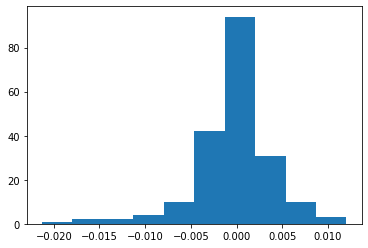

In [72]:
x = np.arange(2, num_epochs + 1)

measure = "absoluteAVH"
for idx in indices:
    plt.figure(figsize=(15,7))
    plt.plot(x, batchwise_staleness[measure][idx])
    plt.scatter(x, batchwise_staleness[measure][idx])
    plt.hlines(y=0, xmin=2, xmax=num_epochs, color='green')
#     plt.hist(epochwise_staleness[idx])
    plt.xlabel('epochs')
    plt.ylabel(measure)
    plt.legend([idx])
    plt.show()
    plt.hist(batchwise_staleness[measure][idx])
    plt.show()

In [74]:
staleness = defaultdict(list)
measure = "AVH"
for epoch in range(2, num_epochs+1):
    for idx in indices:
        p_batch = train_batch[idx][epoch-2]
        p_batch = 32 if t_batch%32==0 else t_batch%32
        p_batch_measure = unaug_df[measure][idx]["epoch_{}_batch_{}".format(epoch-1, p_batch)]
        t_batch = train_batch[idx][epoch-1]
        t_batch = 32 if t_batch%32==0 else t_batch%32
        t_batch_measure = unaug_df[measure][idx]["epoch_{}_batch_{}".format(epoch, t_batch)]
        staleness[idx].append(t_batch_measure-p_batch_measure)
        
batchwise_staleness[measure] = staleness

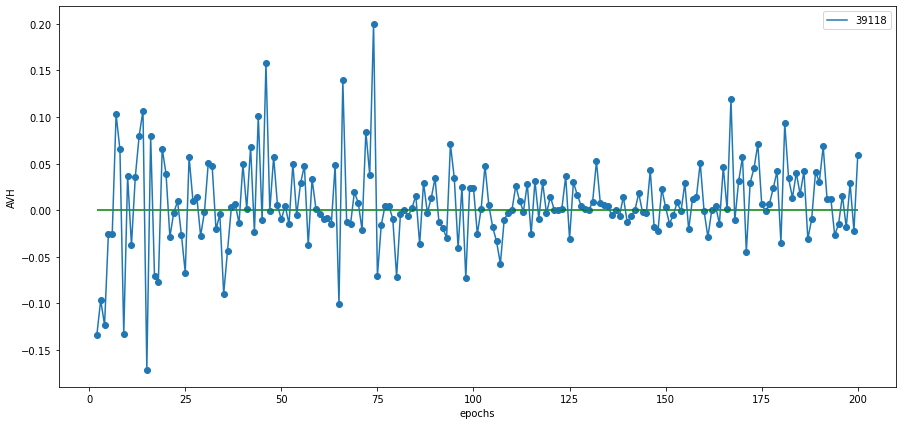

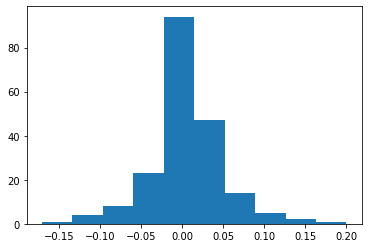

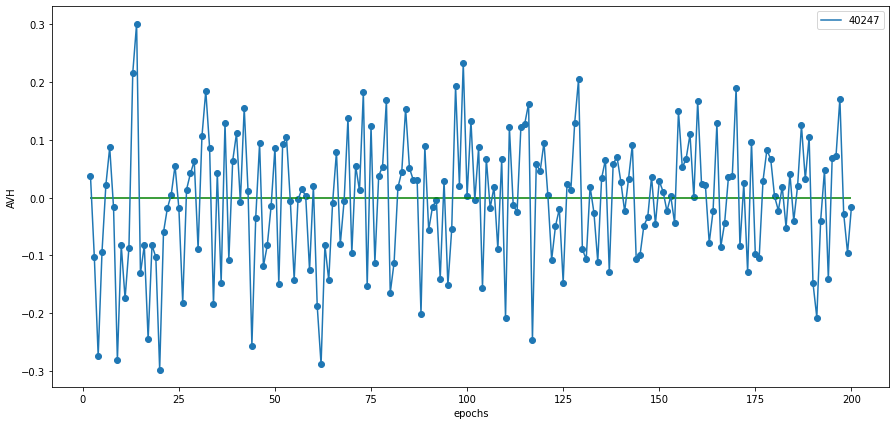

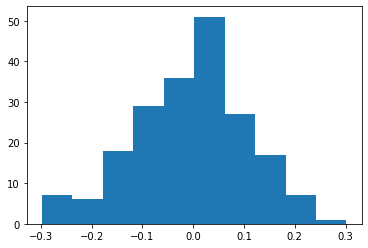

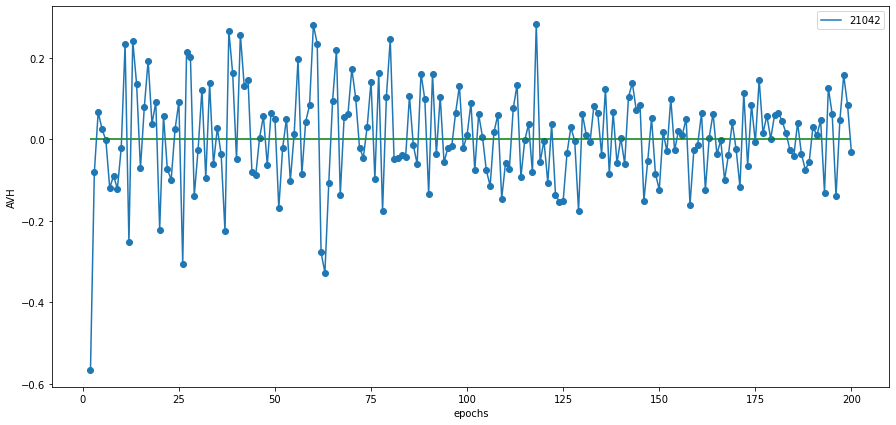

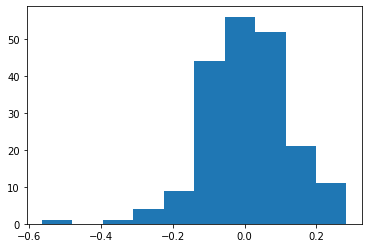

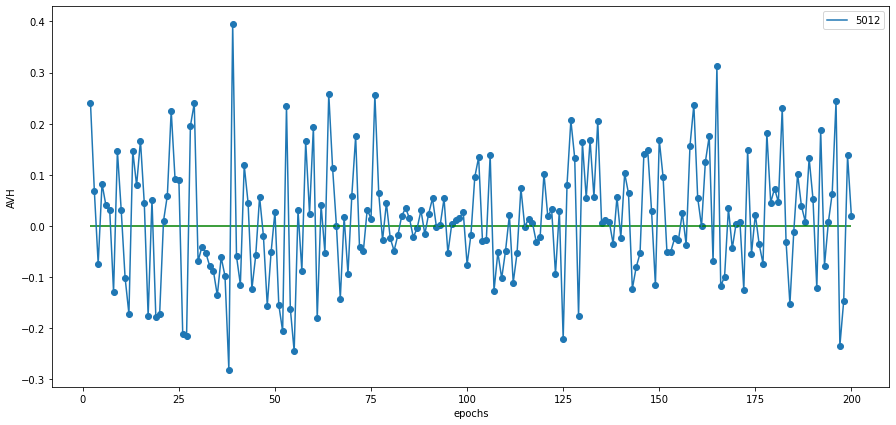

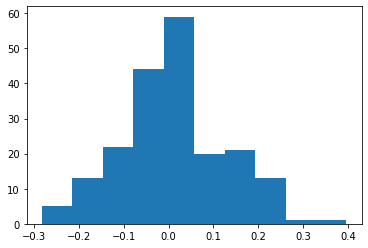

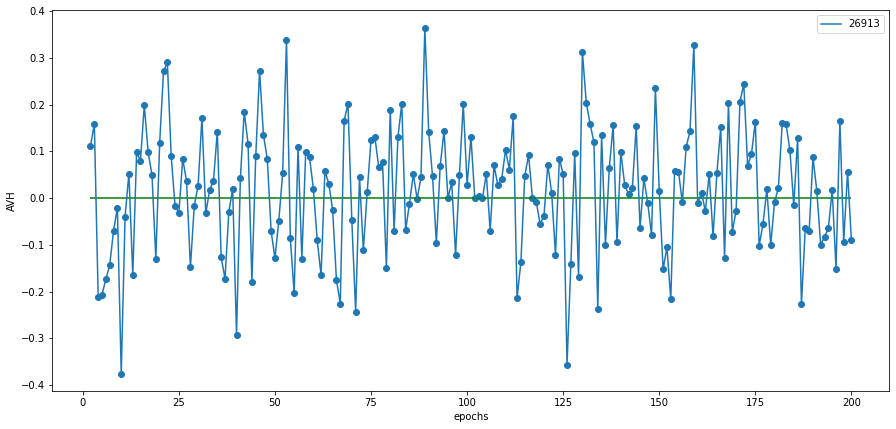

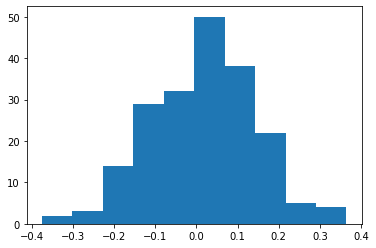

In [75]:
x = np.arange(2, num_epochs + 1)

measure = "AVH"
for idx in indices:
    plt.figure(figsize=(15,7))
    plt.plot(x, batchwise_staleness[measure][idx])
    plt.scatter(x, batchwise_staleness[measure][idx])
    plt.hlines(y=0, xmin=2, xmax=num_epochs, color='green')
#     plt.hist(epochwise_staleness[idx])
    plt.xlabel('epochs')
    plt.ylabel(measure)
    plt.legend([idx])
    plt.show()
    plt.hist(batchwise_staleness[measure][idx])
    plt.show()

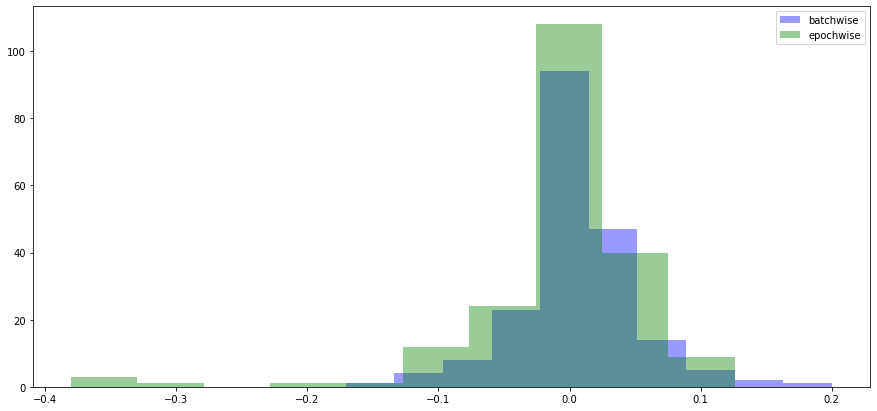

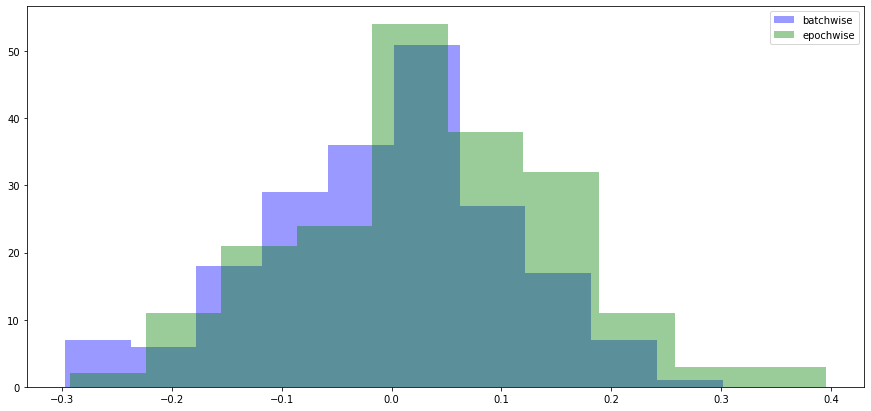

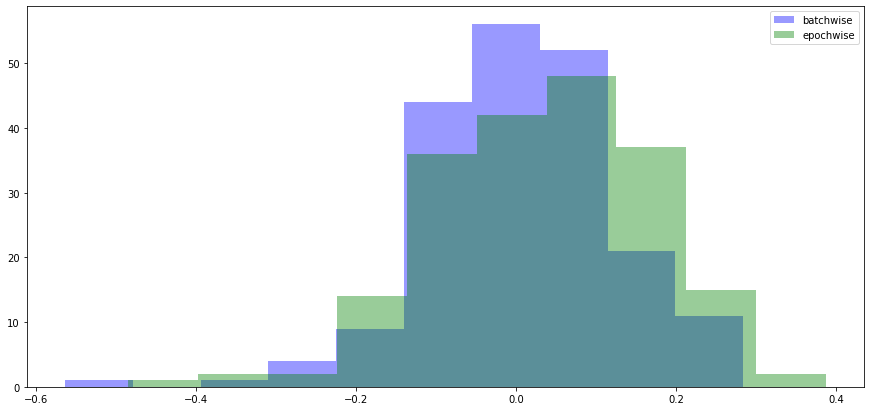

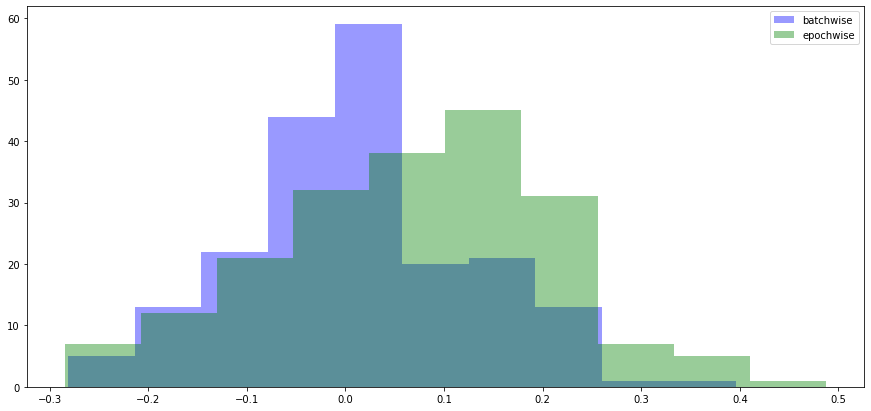

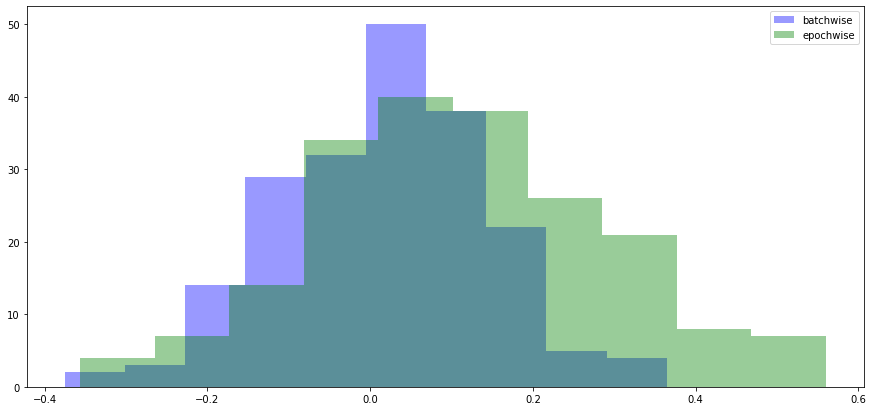

In [81]:
x = np.arange(2, num_epochs + 1)

measure = "AVH"
for idx in indices:
    plt.figure(figsize=(15,7))
    plt.hist(batchwise_staleness[measure][idx], color='blue', alpha=0.4)
    plt.hist(epochwise_staleness[measure][idx], color='green', alpha=0.4)
    plt.legend(["batchwise", "epochwise"])
    plt.show()

In [93]:
staleness = defaultdict(list)
measure = "AVH"
for epoch in range(2, num_epochs+1):
    for idx in list(unaug_df[measure].columns):
#         print(idx)
        u_batch_measure = unaug_df[measure][idx]["epoch_{}_batch_{}".format(epoch-1, 32)]
        t_batch = train_batch[idx][epoch-1]
        t_batch = 32 if t_batch%32==0 else t_batch%32
        t_batch_measure = unaug_df[measure][idx]["epoch_{}_batch_{}".format(epoch, t_batch)]
        staleness[idx].append(t_batch_measure-u_batch_measure)
        
epochwise_staleness[measure] = staleness

In [94]:
staleness = defaultdict(list)
measure = "AVH"
for epoch in range(2, num_epochs+1):
    for idx in list(unaug_df[measure].columns):
        p_batch = train_batch[idx][epoch-2]
        p_batch = 32 if t_batch%32==0 else t_batch%32
        p_batch_measure = unaug_df[measure][idx]["epoch_{}_batch_{}".format(epoch-1, p_batch)]
        t_batch = train_batch[idx][epoch-1]
        t_batch = 32 if t_batch%32==0 else t_batch%32
        t_batch_measure = unaug_df[measure][idx]["epoch_{}_batch_{}".format(epoch, t_batch)]
        staleness[idx].append(t_batch_measure-p_batch_measure)
        
batchwise_staleness[measure] = staleness

In [95]:
batchwise_df = pd.DataFrame(batchwise_staleness[measure])
epochwise_df = pd.DataFrame(epochwise_staleness[measure])

In [108]:
batchwise_mean = batchwise_df.mean(axis=1).values
batchwise_std = batchwise_df.std(axis=1).values

In [109]:
epochwise_mean = epochwise_df.mean(axis=1).values
epochwise_std = epochwise_df.std(axis=1).values

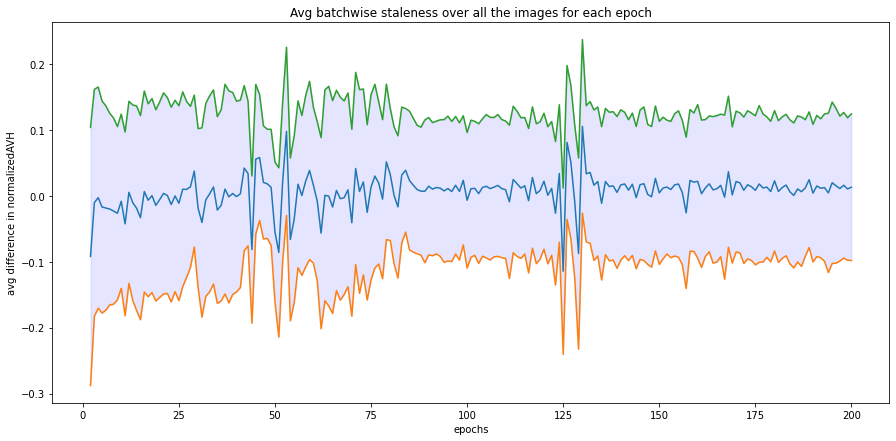

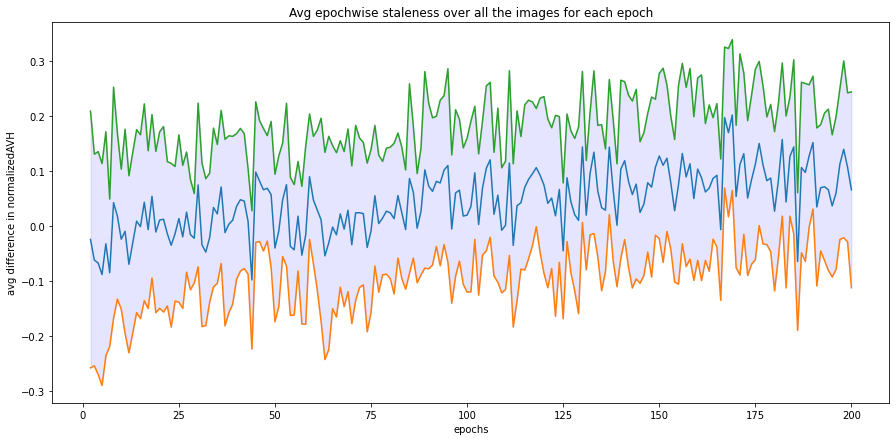

In [115]:
x = np.arange(2, num_epochs + 1)

measure = "AVH"
plt.figure(figsize=(15,7))
plt.plot(x, batchwise_mean)
plt.plot(x, batchwise_mean-batchwise_std)
plt.plot(x, batchwise_mean+batchwise_std)
plt.fill_between(x, batchwise_mean-batchwise_std, batchwise_mean+batchwise_std, color='blue', alpha=0.1)
plt.xlabel('epochs')
plt.ylabel('avg difference in normalizedAVH')
plt.title('Avg batchwise staleness over all the images for each epoch')
plt.show()

plt.figure(figsize=(15,7))
plt.plot(x, epochwise_mean)
plt.plot(x, epochwise_mean-epochwise_std)
plt.plot(x, epochwise_mean+epochwise_std)
plt.fill_between(x, epochwise_mean-epochwise_std, epochwise_mean+epochwise_std, color='blue', alpha=0.1)
plt.xlabel('epochs')
plt.ylabel('avg difference in normalizedAVH')
plt.title('Avg epochwise staleness over all the images for each epoch')
plt.show()

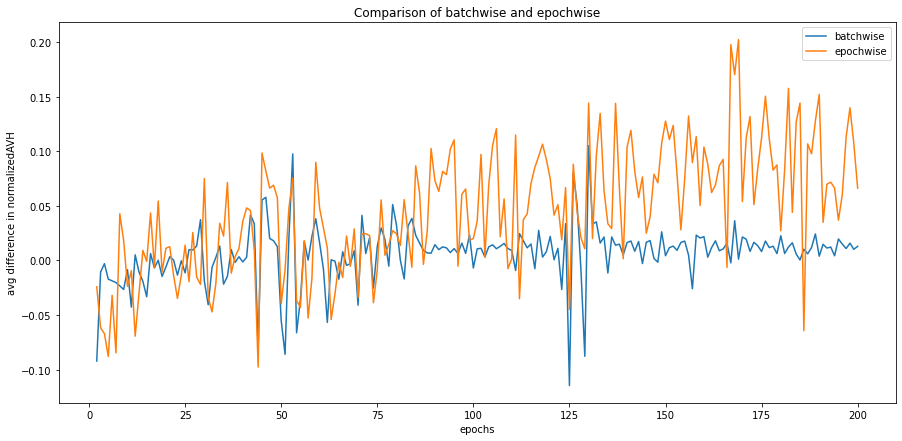

In [118]:
plt.figure(figsize=(15,7))
plt.plot(x, batchwise_mean)
plt.plot(x, epochwise_mean)
plt.xlabel('epochs')
plt.ylabel('avg difference in normalizedAVH')
plt.title('Comparison of batchwise and epochwise')
plt.legend(["batchwise", "epochwise"])
plt.show()

In [122]:
per_image_mean_batchwise = batchwise_df.mean(axis=0)
per_image_mean_epochwise = epochwise_df.mean(axis=0)

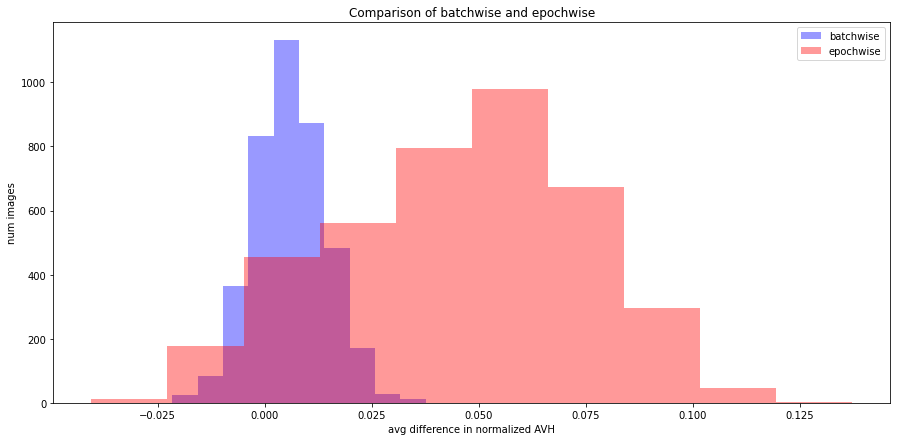

In [125]:
plt.figure(figsize=(15,7))
plt.hist(per_image_mean_batchwise, color='blue', alpha=0.4)
plt.hist(per_image_mean_epochwise, color='red', alpha=0.4)
plt.xlabel('avg difference in normalized AVH')
plt.ylabel('num images')
plt.title('Comparison of batchwise and epochwise')
plt.legend(["batchwise", "epochwise"])
plt.show()

In [166]:
batch = []
for i in range(1, num_epochs*32 + 1):
    batch.extend([i]*400)

In [167]:
plottable_dict = defaultdict(list)
for i in range(10):
    plottable_dict['avh'].extend(list(unaug_df[splits[i].index].values.flatten()))
    plottable_dict['batch'].extend(batch)
    plottable_dict['bins'].extend(['bin_{}'.format(i)] * num_epochs*32*400)

In [168]:
plottable_df = pd.DataFrame(plottable_dict)

In [169]:
plottable_df.head()

,avh,batch,bins
0,0.095757,1,bin_0
1,0.095917,1,bin_0
2,0.095983,1,bin_0
3,0.096023,1,bin_0
4,0.096041,1,bin_0


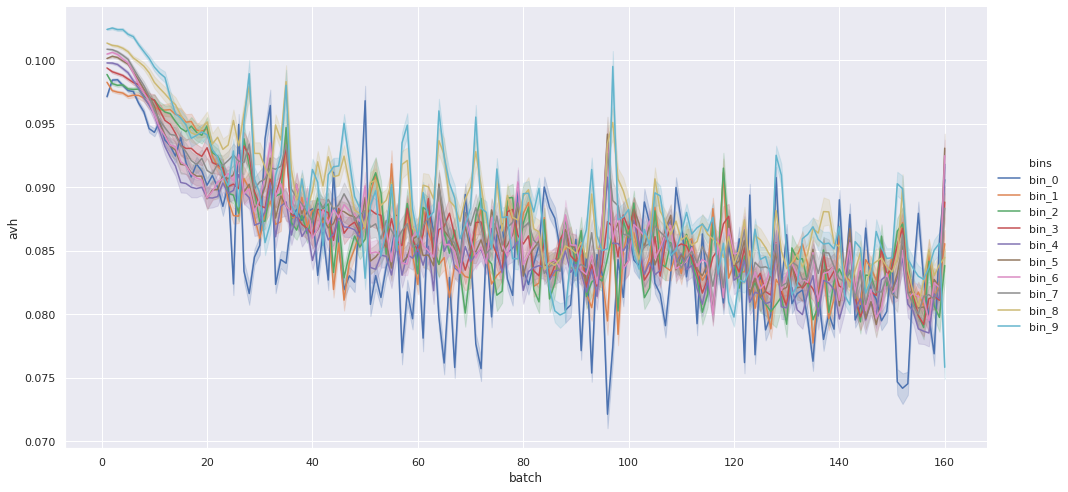

In [170]:
sns.relplot(x="batch", y="avh", hue="bins", kind="line", data=plottable_df, height=7, aspect=2);

**For Augmented Data**

In [171]:
aug_data = dict()
for epoch in epochs:
    path = os.path.join(augmented_run_path, "hardness_data_epoch_{}.pt".format(epoch))
    aug_data["epoch_{}".format(epoch)] = torch.load(path)

In [172]:
data = []
index = []
for epoch in epochs:
    for i in range(1, 33):
        data.append(aug_data['epoch_{}'.format(epoch)]['batch_{}'.format(i)][measure])
        index.append('epoch_{}_batch_{}'.format(epoch, i))
aug_df = pd.DataFrame(data, index=index)

In [173]:
aug_df.head()

,35684,14537,17842,2527,12803,10861,31998,33550,25662,49513,...,30574,31533,19770,18403,25591,268,33505,39187,47750,27879
epoch_1_batch_1,0.104715,0.101367,0.099362,0.096761,0.104894,0.105727,0.105780,0.103359,0.104829,0.100205,...,0.096670,0.096801,0.098619,0.105419,0.102564,0.105246,0.097440,0.097145,0.102172,0.104060
epoch_1_batch_2,0.103731,0.101192,0.100196,0.096185,0.104103,0.105838,0.106672,0.102073,0.104041,0.101559,...,0.096610,0.096760,0.099462,0.105788,0.101610,0.105836,0.097205,0.096658,0.101307,0.104250
epoch_1_batch_3,0.103075,0.100586,0.100081,0.096488,0.103782,0.105637,0.106594,0.101623,0.103704,0.101663,...,0.097076,0.097010,0.099437,0.105613,0.100891,0.105569,0.097287,0.097137,0.101370,0.103574
epoch_1_batch_4,0.102751,0.100420,0.100345,0.096498,0.103645,0.105785,0.106262,0.101549,0.103306,0.102177,...,0.097305,0.096837,0.099972,0.105450,0.100243,0.105291,0.097299,0.097233,0.101073,0.103379
epoch_1_batch_5,0.102691,0.100316,0.099449,0.097411,0.103560,0.105778,0.105933,0.101903,0.103395,0.101416,...,0.098119,0.096670,0.099716,0.104894,0.100023,0.104946,0.096723,0.097981,0.101627,0.103280


In [174]:
first_batch = aug_df.loc['epoch_1_batch_1'].sort_values()
splits = np.array_split(first_batch, 10)

In [175]:
splits[0].index

Int64Index([17345,  3353, 26977, 19227,  3829,  2333,   859, 46821, 30788,
            12490,
            ...
            46292, 34723, 40347, 16725, 19166, 49766, 21351, 22028, 27152,
            44908],
           dtype='int64', length=400)

In [176]:
aug_df[splits[0].index].head()

,17345,3353,26977,19227,3829,2333,859,46821,30788,12490,...,46292,34723,40347,16725,19166,49766,21351,22028,27152,44908
epoch_1_batch_1,0.094946,0.095004,0.095159,0.095241,0.095265,0.095310,0.095321,0.095342,0.095349,0.095392,...,0.096547,0.096548,0.096548,0.096549,0.096551,0.096553,0.096553,0.096555,0.096555,0.096556
epoch_1_batch_2,0.096785,0.098726,0.096650,0.097443,0.096833,0.096379,0.096423,0.097329,0.097177,0.096829,...,0.097974,0.097813,0.099726,0.095924,0.098021,0.095127,0.096715,0.096211,0.096835,0.095646
epoch_1_batch_3,0.097908,0.099805,0.097028,0.099137,0.097563,0.096643,0.097095,0.098206,0.097866,0.097456,...,0.098563,0.097781,0.101143,0.096250,0.097673,0.094957,0.097161,0.096398,0.097429,0.095698
epoch_1_batch_4,0.097185,0.099227,0.096418,0.098744,0.097044,0.096059,0.096514,0.097564,0.096953,0.096779,...,0.098268,0.096558,0.100969,0.096139,0.097145,0.095038,0.097208,0.096839,0.097774,0.095851
epoch_1_batch_5,0.096680,0.098599,0.095932,0.098114,0.095943,0.095027,0.095860,0.096788,0.096435,0.096199,...,0.098005,0.093639,0.100793,0.096240,0.095448,0.095292,0.098019,0.097701,0.098524,0.095971


In [177]:
indices = list(aug_df.sum(axis=0).sort_values().index[[0, 1000, 2000, 3000, 3999]])

In [178]:
indices

[36746, 28103, 39004, 42854, 44225]

In [179]:
train_batch = defaultdict(list)
for i in range(1, num_epochs*32+1):
    epoch = (i-1)//32 + 1
    batch = i%32
    if batch==0:
        batch = 32
    batch_indices = aug_data['epoch_{}'.format(epoch)]['batch_{}_indices'.format(batch)]
    for idx in indices:
        if idx in batch_indices:
            train_batch[idx].append(i)

In [180]:
train_batch

defaultdict(list,
            {42854: [1, 57, 75, 124, 149],
             28103: [15, 38, 73, 101, 152],
             44225: [21, 61, 80, 115, 129],
             39004: [23, 50, 75, 117, 140],
             36746: [31, 48, 70, 105, 133]})

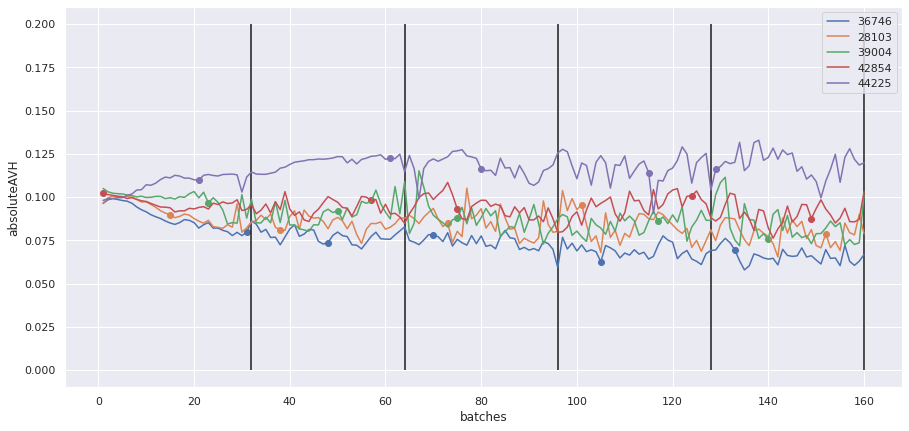

In [188]:
x = np.arange(1, num_epochs*32 + 1)
plt.figure(figsize=(15,7))
for idx in indices:
    plt.plot(x, aug_df[idx])
    plt.scatter(train_batch[idx], [aug_df[idx]['epoch_{}_batch_{}'.format(j+1, 32 if i%32==0 else i%32)] for j, i in enumerate(train_batch[idx])])
plt.vlines(x=epochs*32, ymin=0, ymax=0.2, colors='k')
plt.xlabel('batches')
plt.ylabel(measure)
plt.legend(indices)
plt.show()

In [189]:
batch = []
for i in range(1, num_epochs*32 + 1):
    batch.extend([i]*400)

In [190]:
plottable_dict = defaultdict(list)
for i in range(10):
    plottable_dict['avh'].extend(list(aug_df[splits[i].index].values.flatten()))
    plottable_dict['batch'].extend(batch)
    plottable_dict['bins'].extend(['bin_{}'.format(i)] * num_epochs*32*400)

In [191]:
plottable_df = pd.DataFrame(plottable_dict)

In [192]:
plottable_df.head()

,avh,batch,bins
0,0.094946,1,bin_0
1,0.095004,1,bin_0
2,0.095159,1,bin_0
3,0.095241,1,bin_0
4,0.095265,1,bin_0


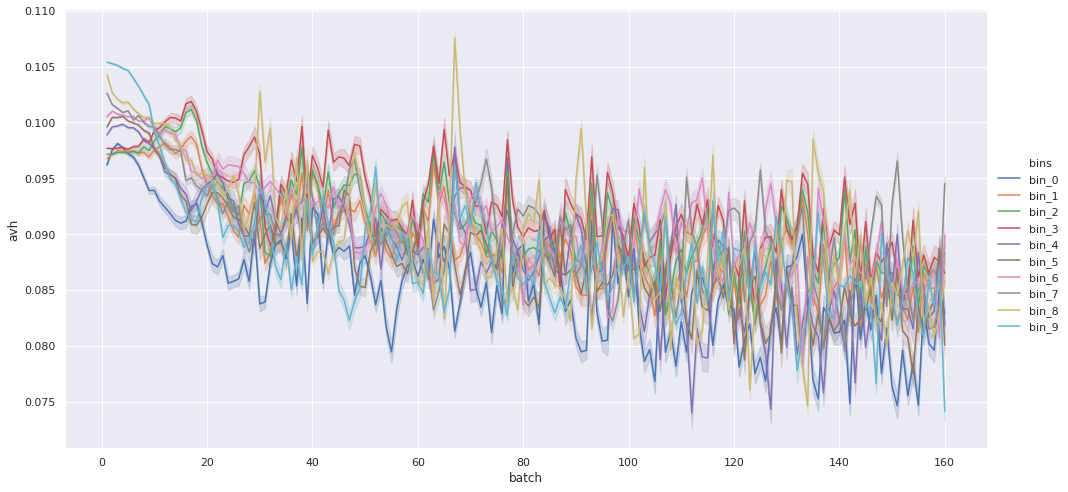

In [187]:
sns.relplot(x="batch", y="avh", hue="bins", kind="line", data=plottable_df, height=7, aspect=2);